# Option 2: Tertile based on specific cut point

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### OAI

In [2]:
df = pd.read_csv("../Changes_in_PA/data/OAI/merged_three_OAI.csv")
df.shape

(4308, 1817)

In [3]:
print("PASE baseline, number of NaN:", df.V00PASE.isna().sum())
print("PASE followup, number of NaN:", df.V01PASE.isna().sum())

PASE baseline, number of NaN: 0
PASE followup, number of NaN: 0


Tertiles based on the specified cut points in the paper (31–152 for tertile1, 153–207 for tertile2, and 208–368 for tertile3 ):

##### Baseline

In [4]:
########### Baseline
# Adjust bins and labels to match the specified ranges correctly
# Correcting the approach to include only the relevant ranges
bins = [31, 152, 207, 368]  # Adjusted to start at 31 as per the original tertile definitions
labels = ['31–152', '153–207', '208–368']

# Now using pd.cut() with the corrected bins and labels
df['TertileBaselinePase'] = pd.cut(df['V00PASE'], bins=bins, labels=labels, include_lowest=True, right=True)

# Count the number of cases in each tertile
tertile_counts = df['TertileBaselinePase'].value_counts().sort_index()

# Display the counts
print(tertile_counts)
print(df.TertileBaselinePase.unique())

TertileBaselinePase
31–152     2074
153–207     970
208–368    1097
Name: count, dtype: int64
['31–152', '153–207', '208–368', NaN]
Categories (3, object): ['31–152' < '153–207' < '208–368']


##### Followup

In [5]:
########### Follow up
# Adjust bins and labels to match the specified ranges correctly
# Correcting the approach to include only the relevant ranges
bins = [31, 152, 207, 368]  # Adjusted to start at 31 as per the original tertile definitions
labels = ['31–152', '153–207', '208–368']

# Now using pd.cut() with the corrected bins and labels
df['TertilefollowupPase'] = pd.cut(df['V01PASE'], bins=bins, labels=labels, include_lowest=True, right=True)

# Count the number of cases in each tertile
tertile_counts = df['TertilefollowupPase'].value_counts().sort_index()


# Display the counts
print(tertile_counts)
print(df.TertilefollowupPase.unique())

TertilefollowupPase
31–152     2183
153–207     896
208–368    1070
Name: count, dtype: int64
['31–152', '153–207', '208–368', NaN]
Categories (3, object): ['31–152' < '153–207' < '208–368']


/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


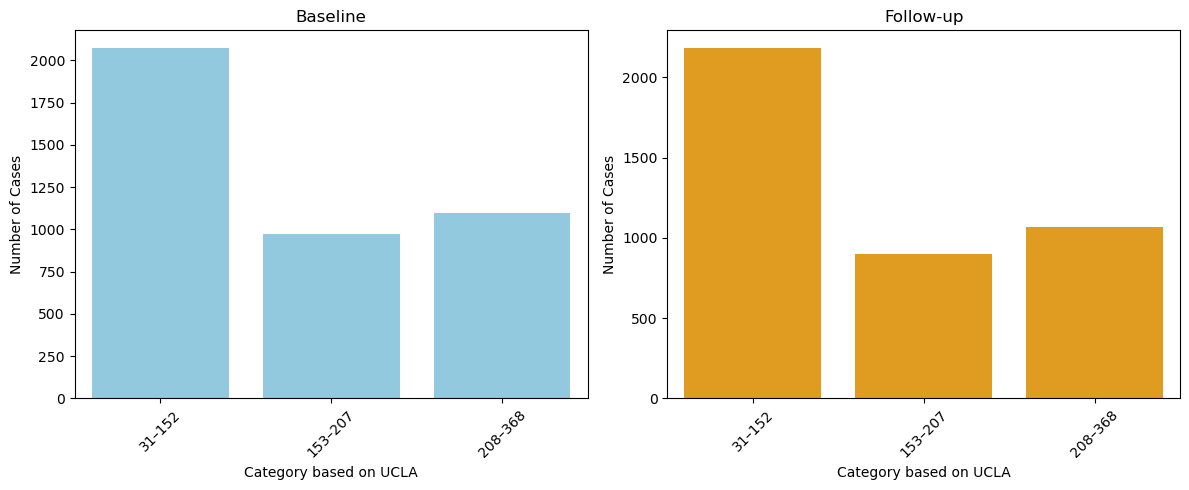

In [6]:
# Adjust bins and labels to match the specified ranges correctly for both baseline and follow-up
bins = [31, 152, 207, 368]  # Adjusted to start at 31 as per the original tertile definitions
labels = ['31–152', '153–207', '208–368']

# Using pd.cut() with the corrected bins and labels for both baseline and follow-up
df['TertileBaseline'] = pd.cut(df['V00PASE'], bins=bins, labels=labels, include_lowest=True)
df['TertileFollowup'] = pd.cut(df['V01PASE'], bins=bins, labels=labels, include_lowest=True)

# Preparing data for plotting
# We group by the tertile and count the number of occurrences in each to simulate what you had before
baseline_counts = df['TertileBaseline'].value_counts().sort_index()
followup_counts = df['TertileFollowup'].value_counts().sort_index()

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Baseline
sns.barplot(x=baseline_counts.index, y=baseline_counts.values, ax=axs[0], color='skyblue').set_title('Baseline')
axs[0].set_xlabel('Category based on UCLA')
axs[0].set_ylabel('Number of Cases')
axs[0].tick_params(axis='x', rotation=45)

# Plot for Follow-up
sns.barplot(x=followup_counts.index, y=followup_counts.values, ax=axs[1], color='orange').set_title('Follow-up')
axs[1].set_xlabel('Category based on UCLA')
axs[1].set_ylabel('Number of Cases')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [7]:
print("value count:")
print(df.TertileBaselinePase.value_counts())
print("---------")
print(df.TertilefollowupPase.value_counts())
print("---------")
print("unique:")
print(df.TertileBaselinePase.unique())
print("---------")
print(df.TertilefollowupPase.unique())

value count:
TertileBaselinePase
31–152     2074
208–368    1097
153–207     970
Name: count, dtype: int64
---------
TertilefollowupPase
31–152     2183
208–368    1070
153–207     896
Name: count, dtype: int64
---------
unique:
['31–152', '153–207', '208–368', NaN]
Categories (3, object): ['31–152' < '153–207' < '208–368']
---------
['31–152', '153–207', '208–368', NaN]
Categories (3, object): ['31–152' < '153–207' < '208–368']


In [8]:
df = df.dropna(subset=['TertilefollowupPase', 'TertileBaselinePase'])

In [9]:
print("value count:")
print(df.TertileBaselinePase.value_counts())
print("---------")
print(df.TertilefollowupPase.value_counts())
print("---------")
print("unique:")
print(df.TertileBaselinePase.unique())
print("---------")
print(df.TertilefollowupPase.unique())

value count:
TertileBaselinePase
31–152     1999
208–368    1065
153–207     953
Name: count, dtype: int64
---------
TertilefollowupPase
31–152     2111
208–368    1030
153–207     876
Name: count, dtype: int64
---------
unique:
['31–152', '153–207', '208–368']
Categories (3, object): ['31–152' < '153–207' < '208–368']
---------
['31–152', '153–207', '208–368']
Categories (3, object): ['31–152' < '153–207' < '208–368']


##### Increased / Decreased

Change
Increased     855
Unchanged    2403
Decreased     759
Name: count, dtype: int64


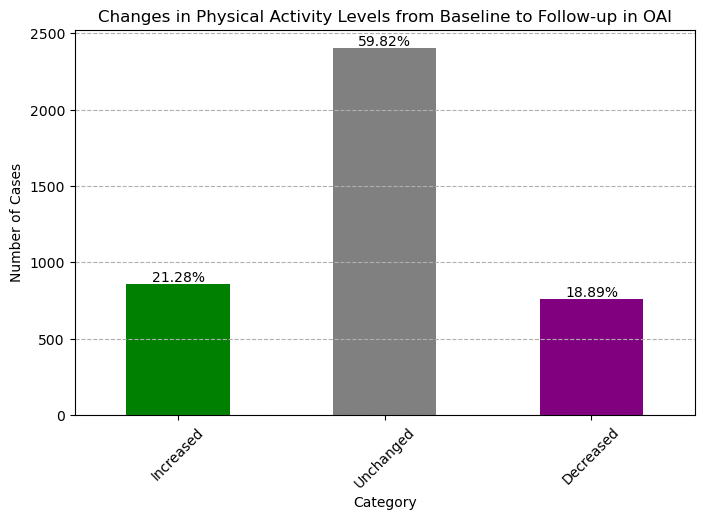

In [10]:
import matplotlib.pyplot as plt

# Function to categorize change based on tertile comparison
def categorize_change(row):
    if row['TertileBaselinePase'] < row['TertilefollowupPase']:
        return 'Increased'
    elif row['TertileBaselinePase'] > row['TertilefollowupPase']:
        return 'Decreased'
    else:
        return 'Unchanged'

# Add 'Change' column based on comparison
df['Change'] = df.apply(lambda row: categorize_change(row), axis=1)

# Count how many cases increased, decreased, or had no change
# Ensure the order Increased, Unchanged, Decreased for plotting
change_counts = df['Change'].value_counts().reindex(['Increased', 'Unchanged', 'Decreased'])

# Display the counts
print(change_counts)

# Plot the counts with specified order and color
plt.figure(figsize=(8, 5))
ax = change_counts.plot(kind='bar', color=['green', 'grey', 'purple'])
plt.title('Changes in Physical Activity Levels from Baseline to Follow-up in OAI')
plt.xlabel('Category')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Calculate the percentages and annotate the bars
total = change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


#### GLAD

Tertiles based on the specified cut points (1,2,3,4 for tertile 1, 5,6 for tertile 2, and 7,8,9 for tertile 3 ): UCLA based on Linda's paper

In [11]:
dfg = pd.read_stata("data/GLAD/GladWithRejion_030323_updated.dta")

In [12]:
# Remove NaN value from UCLA in GLAD:
dfg = dfg.dropna(subset=['ptb_4145', 'pt12_4145'])
print("GLAD shape:",dfg.shape)

GLAD shape: (30484, 1240)


In [13]:
print("Number of Nan Value in baseline:", dfg.ptb_4145.isna().sum())
print("Number of Nan Value in followup:", dfg.pt12_4145.isna().sum())

Number of Nan Value in baseline: 0
Number of Nan Value in followup: 0


In [14]:
dfg.ptb_4145.unique()

array([ 6.,  7.,  3.,  4.,  5., 10.,  8.,  9.,  2.,  1.])

##### Baseline

In [15]:
# Function to categorize 'ptb_4145' scores into tertiles
def categorize_into_tertiles(value):
    if value in [1, 2, 3, 4]:
        return 'Low'
    elif value in [5, 6]:
        return 'Moderate'
    elif value in [7, 8, 9, 10]:
        return 'High'

# Apply the function to categorize each 'ptb_4145' score
dfg['baseline_tertiles'] = dfg['ptb_4145'].apply(categorize_into_tertiles)

# Verify the distribution across tertiles
tertile_distribution = dfg['baseline_tertiles'].value_counts().sort_index()
print(tertile_distribution)

baseline_tertiles
High         9551
Low          9109
Moderate    11824
Name: count, dtype: int64


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_63437/243580388.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['baseline_tertiles'] = dfg['ptb_4145'].apply(categorize_into_tertiles)


##### Followup

In [16]:
###### Follow up 
# Function to categorize 'pt12_4145' scores into tertiles
def categorize_into_tertiles(value):
    if value in [1, 2, 3, 4]:
        return 'Low'
    elif value in [5, 6]:
        return 'Moderate'
    elif value in [7, 8, 9, 10]:
        return 'High'

# Apply the function to categorize each 'pt12_4145' score
dfg['followup_tertiles'] = dfg['pt12_4145'].apply(categorize_into_tertiles)

# Verify the distribution across tertiles
tertile_distribution = dfg['followup_tertiles'].value_counts().sort_index()
print(tertile_distribution)


followup_tertiles
High        10652
Low          7615
Moderate    12217
Name: count, dtype: int64


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_63437/3603032299.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['followup_tertiles'] = dfg['pt12_4145'].apply(categorize_into_tertiles)


In [17]:
dfg

,fysb_replyTime,fysb_3629,fysb_affiliationId,fysb_affiliation_samlet,fysb_organisation,fysb_region,age,gender,fysb_9344,fysb_9345,...,PT12_39675,PT12_39676,Pt12_fes_i_score,PT12_39880,PT12_39881,stop_replyTime,stop_9561,stop_9563,baseline_tertiles,followup_tertiles
0,2013-01-29 14:37:42,2013-01-14,11431,11431,3.0,5.0,70,1,71.0,172.0,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,Moderate,High
1,2013-01-29 14:49:19,2013-01-15,11431,11431,3.0,5.0,66,2,69.0,164.0,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,High,High
2,2013-01-30 09:58:02,2013-12-06,11431,11431,3.0,5.0,44,2,102.0,178.0,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,High,High
3,2013-01-30 14:10:27,2013-01-30,11475,1100,2.0,2.0,49,1,110.0,180.0,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,Low,Low
4,2013-02-01 11:11:03,2013-02-01,11431,11431,3.0,5.0,67,2,82.0,169.0,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,Low,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60297,2022-01-12 14:12:35,2022-01-12,359434,359434,3.0,3.0,47,2,84.0,178.0,...,3.0,4.0,20.0,4.0,4.0,NaT,NaT,NaN,Low,Low
60298,2022-01-12 14:18:03,2022-01-12,360248,360248,3.0,4.0,65,2,96.0,178.0,...,1.0,2.0,10.0,4.0,4.0,NaT,NaT,NaN,High,Moderate
60305,2022-01-13 08:31:09,2022-01-13,16717,16717,3.0,3.0,45,2,75.0,167.0,...,1.0,1.0,7.0,4.0,4.0,NaT,NaT,NaN,High,High
60307,2022-01-13 09:20:05,2022-01-13,16380,16380,2.0,2.0,60,2,72.0,161.0,...,2.0,1.0,9.0,4.0,4.0,NaT,NaT,NaN,Low,Low


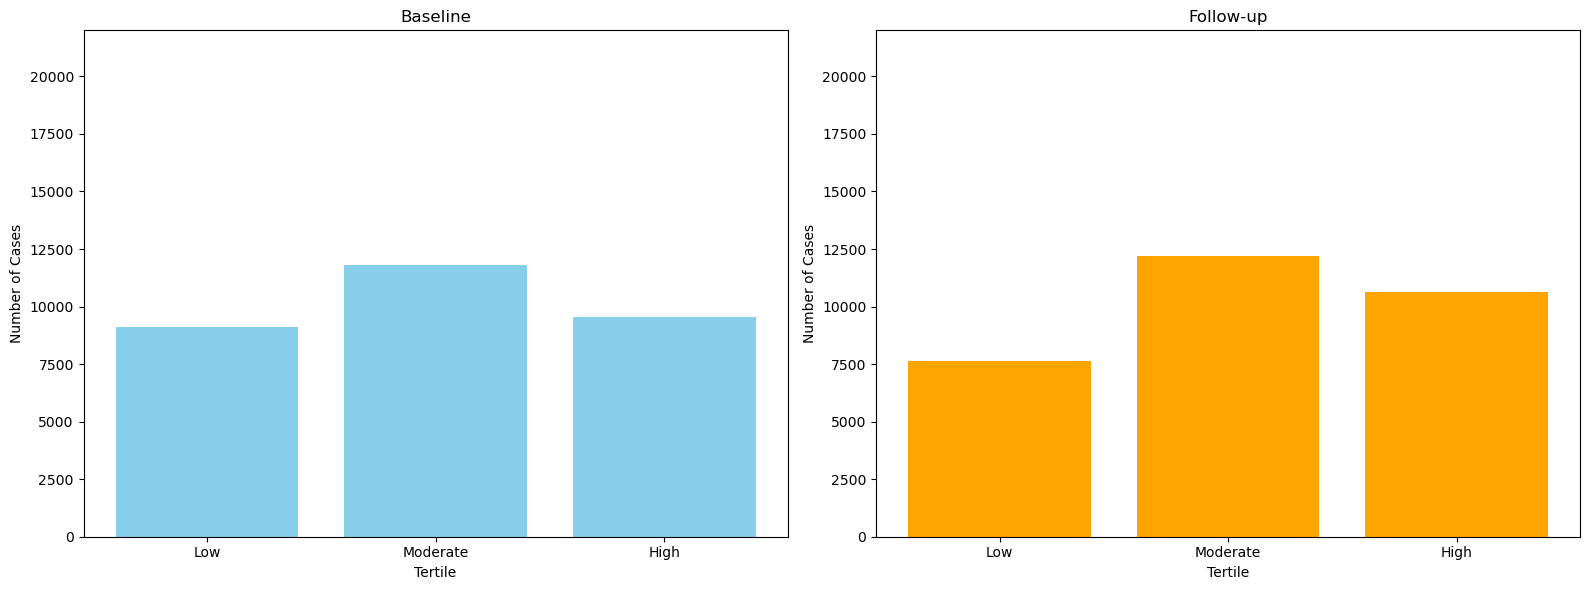

In [18]:
# Function to categorize scores into tertiles
def categorize_into_tertiles(value):
    if value in [1, 2, 3, 4]:
        return 'Low'
    elif value in [5, 6]:
        return 'Moderate'
    elif value in [7, 8, 9, 10]:
        return 'High'

# Apply the function to categorize each 'ptb_4145' score into baseline tertiles
dfg['baseline_tertiles'] = dfg['ptb_4145'].apply(categorize_into_tertiles)

# Apply the function to categorize each 'pt12_4145' score into follow-up tertiles
dfg['followup_tertiles'] = dfg['pt12_4145'].apply(categorize_into_tertiles)

# Ensure the tertile order as "Low", "Moderate", "High"
tertile_order = ['Low', 'Moderate', 'High']

# Preparing data for plotting by ensuring order and replacing NaN with 0 where there are no cases
baseline_tertile_distribution = dfg['baseline_tertiles'].value_counts().reindex(tertile_order, fill_value=0)
followup_tertile_distribution = dfg['followup_tertiles'].value_counts().reindex(tertile_order, fill_value=0)

# Creating a single figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for baseline tertiles
axs[0].bar(baseline_tertile_distribution.index, baseline_tertile_distribution.values, color='skyblue')
axs[0].set_title('Baseline')
axs[0].set_xlabel('Tertile')
axs[0].set_ylabel('Number of Cases')
axs[0].tick_params(axis='x', rotation=0)
axs[0].set_ylim(0, 22000)

# Plot for follow-up tertiles
axs[1].bar(followup_tertile_distribution.index, followup_tertile_distribution.values, color='orange')
axs[1].set_title('Follow-up')
axs[1].set_xlabel('Tertile')
axs[1].set_ylabel('Number of Cases')
axs[1].tick_params(axis='x', rotation=0)
axs[1].set_ylim(0, 22000)  


plt.tight_layout()
plt.show()



In [19]:
unique_baseline_tertiles = dfg['baseline_tertiles'].unique()
unique_baseline_tertiles


array(['Moderate', 'High', 'Low'], dtype=object)

In [20]:
missing_values_baseline = dfg['baseline_tertiles'].isna().sum()
missing_values_baseline


0

##### Increased / Decreased

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_63437/368327952.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['Change'] = dfg.apply(determine_change_category, axis=1)


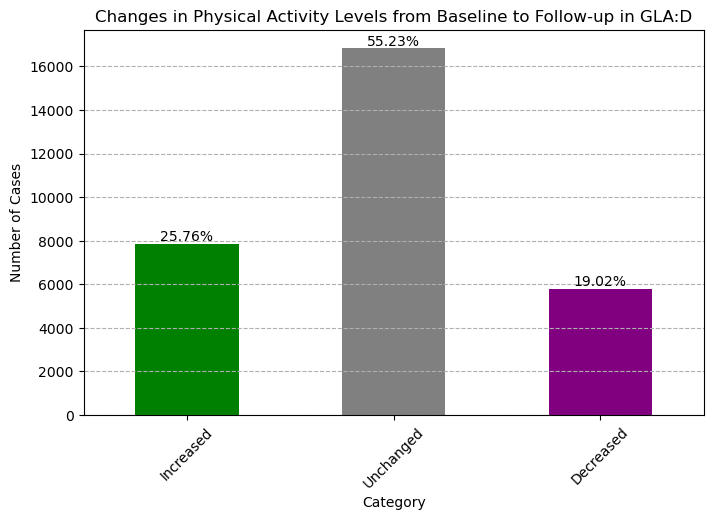

In [21]:
import matplotlib.pyplot as plt

# Function to determine change category based on tertiles
def determine_change_category(row):
    if row['baseline_tertiles'] == row['followup_tertiles']:
        return 'Unchanged'
    elif row['baseline_tertiles'] == 'Low' and (row['followup_tertiles'] == 'Moderate' or row['followup_tertiles'] == 'High'):
        return 'Increased'
    elif row['baseline_tertiles'] == 'Moderate' and row['followup_tertiles'] == 'High':
        return 'Increased'
    elif row['baseline_tertiles'] == 'High' and (row['followup_tertiles'] == 'Moderate' or row['followup_tertiles'] == 'Low'):
        return 'Decreased'
    elif row['baseline_tertiles'] == 'Moderate' and row['followup_tertiles'] == 'Low':
        return 'Decreased'
    else:
        return 'Error'  # Just in case there's a situation not covered above

# Apply the function to each row in the DataFrame
dfg['Change'] = dfg.apply(determine_change_category, axis=1)

# Count the occurrences of each change category
change_counts = dfg['Change'].value_counts()

# Ensure the order of "Increased", "Unchanged", "Decreased" for plotting
change_counts = change_counts.reindex(["Increased", "Unchanged", "Decreased"])

# Plotting the change categories
plt.figure(figsize=(8, 5))
ax = change_counts.plot(kind='bar', color=['green', 'grey', 'purple'])
plt.title('Changes in Physical Activity Levels from Baseline to Follow-up in GLA:D')
plt.xlabel('Category')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Calculate the percentages and annotate the bars
total = change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### Comparison

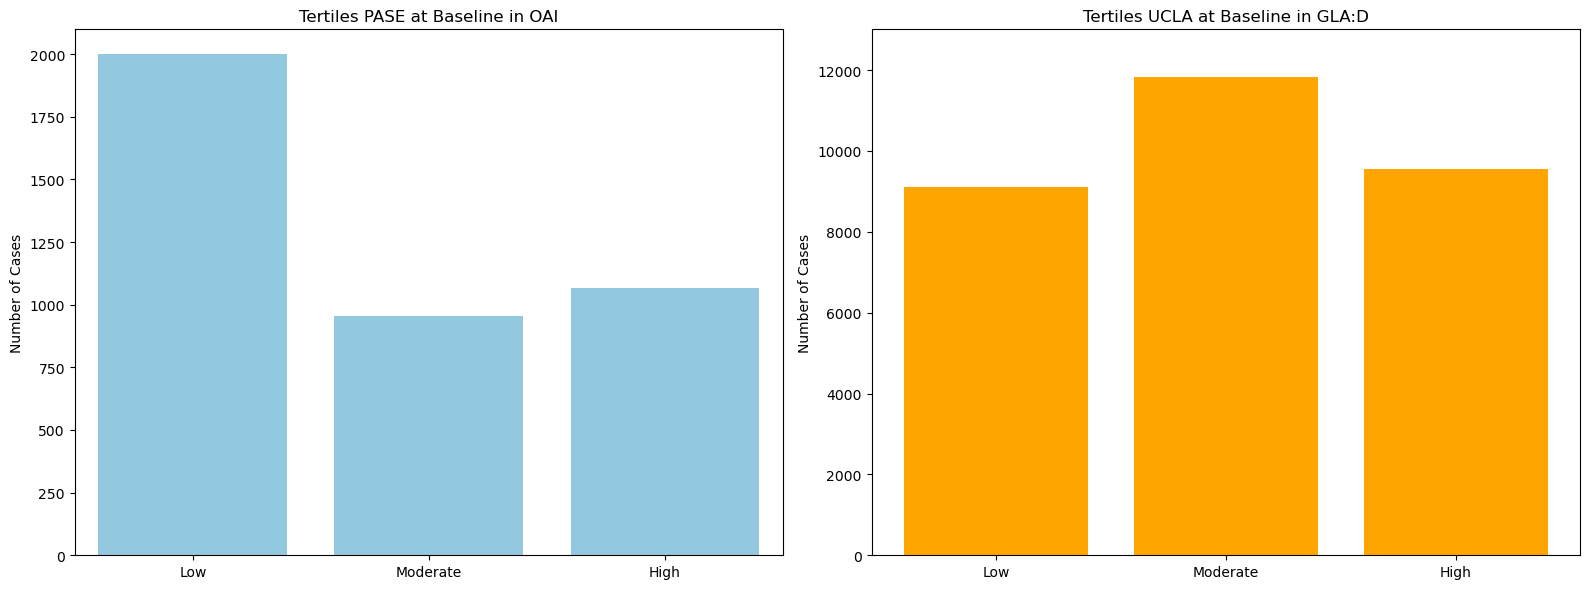

In [22]:

########## OAI baseline
# Adjust bins and labels to match the specified ranges correctly
bins = [31, 152, 207, 368]
labels = ['31–152', '153–207', '208–368']
df['TertileBaseline'] = pd.cut(df['V00PASE'], bins=bins, labels=labels, include_lowest=True)
baseline_counts = df['TertileBaseline'].value_counts().sort_index()

# Remap labels from ranges to "Low", "Moderate", "High"
label_map = {'31–152': 'Low', '153–207': 'Moderate', '208–368': 'High'}
df['TertileBaseline'] = df['TertileBaseline'].map(label_map)
baseline_counts = df['TertileBaseline'].value_counts().reindex(['Low', 'Moderate', 'High'])

############ GLAD baseline
# Function to categorize scores into tertiles
def categorize_into_tertiles(value):
    if value in [1, 2, 3, 4]:
        return 'Low'
    elif value in [5, 6]:
        return 'Moderate'
    elif value in [7, 8, 9, 10]:
        return 'High'
dfg['baseline_tertiles'] = dfg['ptb_4145'].apply(categorize_into_tertiles)
tertile_order = ['Low', 'Moderate', 'High']
baseline_tertile_distribution = dfg['baseline_tertiles'].value_counts().reindex(tertile_order, fill_value=0)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for OAI baseline
sns.barplot(x=baseline_counts.index, y=baseline_counts.values, ax=axs[0], color='skyblue')
axs[0].set_title('Tertiles PASE at Baseline in OAI')
axs[0].set_xlabel('')
axs[0].set_ylabel('Number of Cases')
axs[0].tick_params(axis='x', rotation=0)

# Plot for GLAD baseline
axs[1].bar(baseline_tertile_distribution.index, baseline_tertile_distribution.values, color='orange')
axs[1].set_title('Tertiles UCLA at Baseline in GLA:D')
axs[1].set_xlabel('')
axs[1].set_ylabel('Number of Cases')
axs[1].tick_params(axis='x', rotation=0)
axs[1].set_ylim(0, max(baseline_tertile_distribution.values) * 1.1)  # Adjusted to fit the max count plus some margin

plt.tight_layout()
plt.show()
